In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#import all libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
#load the datasets
trainingData = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
# viewing the data sample
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#impute all available columns except useless ones
#imp = [Sex, 
#       Age(due to missing vals),
#       Embarked(first fill missing with 'C')]

##for now only 'Embarked'
label_encoder = LabelEncoder()

trainingData['Embarked'] = trainingData['Embarked'].fillna('C')

trainingData.isnull().sum()
trainingData.info()

trainingData['Embarked'] = label_encoder.fit_transform(trainingData['Embarked'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
trainingData.Embarked.unique()

array([2, 0, 1])

In [7]:
# show all columns

X = ['Survived', 'Pclass', 'Sex','Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

X_features = trainingData[X]

X_features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [8]:
#encode the categorical Data 'Sex'
X_features['Sex'] = pd.get_dummies(X_features['Sex'], drop_first = True)

#rename the dataset
X_features

/tmp/ipykernel_13/2717463761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features['Sex'] = pd.get_dummies(X_features['Sex'], drop_first = True)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,True,22.0,1,0,7.2500,2
1,1,1,False,38.0,1,0,71.2833,0
2,1,3,False,26.0,0,0,7.9250,2
3,1,1,False,35.0,1,0,53.1000,2
4,0,3,True,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,True,27.0,0,0,13.0000,2
887,1,1,False,19.0,0,0,30.0000,2
888,0,3,False,NaN,1,2,23.4500,2
889,1,1,True,26.0,0,0,30.0000,0


Text(0.5, 1.0, 'Correlation Heatmap')

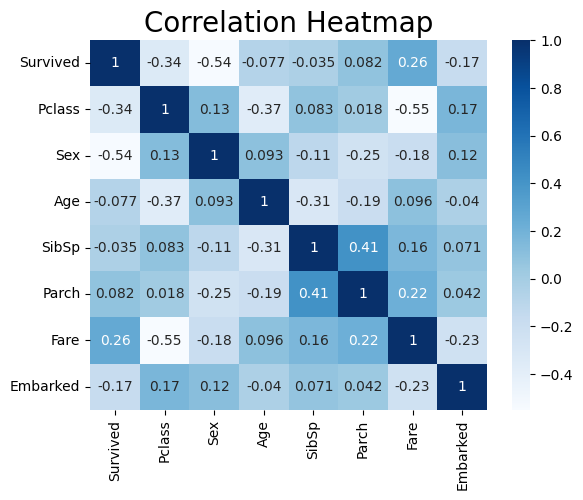

In [9]:
#correlation heatmap
heatmap =  sns.heatmap(X_features.corr(), cmap = "Blues", annot = True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':20})

In [10]:
#feature selection
#First: Let the Dtree select by itself
#Second : ['Age','Sex','Fare']
#Third: All

Final_X = ['Pclass','Sex','Age','Fare','Embarked']
Final_X_features = X_features[Final_X]
Y = trainingData['Survived']

In [11]:
#load the test Data
testingData = pd.read_csv("/kaggle/input/titanic/test.csv")
testX_features = ['Pclass','Sex','Age','Fare','Embarked']
testX = testingData[testX_features]
testX.isnull().sum()

Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

In [12]:
Final_X_features.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
dtype: int64

In [13]:
#impute both datasets

#Age
imputer = SimpleImputer(strategy='mean')
age_imputer = SimpleImputer(strategy = 'most_frequent')
label_encoder = LabelEncoder()


Final_X_features['Age'] = age_imputer.fit_transform(Final_X_features[['Age']])
testX['Age'] = age_imputer.fit_transform(testX[['Age']])

#Fare
testX['Fare'] = imputer.fit_transform(testX[['Fare']])

#Sex
testX['Sex'] = pd.get_dummies(testX['Sex'], drop_first = True)

#Embarked
testX['Embarked'] = label_encoder.fit_transform(testX['Embarked'])
#testX.Embarked.unique()

/tmp/ipykernel_13/1474025730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_X_features['Age'] = age_imputer.fit_transform(Final_X_features[['Age']])
/tmp/ipykernel_13/1474025730.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Age'] = age_imputer.fit_transform(testX[['Age']])
/tmp/ipykernel_13/1474025730.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [14]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(Final_X_features,
                                                   Y,
                                                   test_size = 0.2, 
                                                   random_state = 42)

In [15]:
#Random Forest Model
model = RandomForestClassifier(
                                n_estimators = 100,
                                max_depth = None,
                                random_state = 42,
                              )

model.fit(X_train, Y_train)

pred = model.predict(X_test)

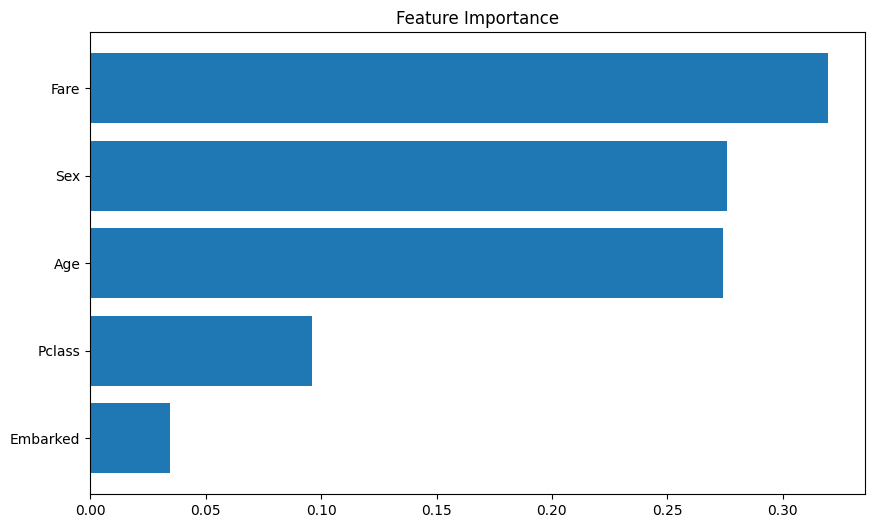

In [16]:
importances = model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()

In [17]:
#metrics
accu = accuracy_score(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)

print(f"Accuracy Score : {accu}")
print(f"Mean Absolute Error : {mae}")
print(classification_report(Y_test, pred))

Accuracy Score : 0.8044692737430168
Mean Absolute Error : 0.19553072625698323
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [18]:
# #tuning tree with Grid SearchCV

# #parameter grid
# param_grid = {
#     'n_estimators' : [50,100,200],
#     'max_depth' : [None, 10,20,30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# rf = RandomForestClassifier(random_state = 42)

# #setup GridSearch
# grid_search = GridSearchCV(
#     estimator = rf,
#     param_grid = param_grid,
#     cv = 5,
#     n_jobs = -1,
#     verbose = 1,
#     scoring = "accuracy"
# )

# #fit the grid search
# grid_search.fit(X_train, Y_train)

# print(f"Best parameters: {grid_search.best_params_}")

# best_model = grid_search.best_estimator_

In [19]:
# #metrics
# best_pred = best_model.predict(X_test)

# accu = accuracy_score(Y_test, best_pred)
# mae = mean_absolute_error(Y_test, best_pred)

# print(f"Accuracy Score : {accu}")
# print(f"Mean Absolute Error : {mae}")
# print(classification_report(Y_test, best_pred))

In [20]:
# #cross validation scores
# scores = cross_val_score(best_model, X_train, Y_train, cv = 5)
# print("Accuracy : ", scores.mean())

In [21]:
# # #tuning tree with Grid SearchCV

# #parameter grid
# param_grid = {
#     'n_estimators' : [10,20,30,40,50,75,100,200],
#     'max_depth' : [None, 10,20,30],
#     'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# rf = RandomForestClassifier(random_state = 42)

# #setup GridSearch
# grid_search = GridSearchCV(
#     estimator = rf,
#     param_grid = param_grid,
#     cv = 5,
#     n_jobs = -1,
#     verbose = 1,
#     scoring = "f1"
# )

# # #fit the grid search
# grid_search.fit(Final_X_features, Y)
# # 
# print(f"Best parameters: {grid_search.best_params_}")

# final_model = grid_search.best_estimator_

In [22]:
testX.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [23]:
#final model
final_model = RandomForestClassifier(
                                n_estimators = 20,
                                max_depth = 10,
                                max_features = None,
                                min_samples_leaf = 2,
                                min_samples_split = 5,
                                random_state = 42
                              )

final_model.fit(Final_X_features, Y)

final_pred = final_model.predict(testX)

In [24]:
test_model = RandomForestClassifier(
                                n_estimators = 20,
                                max_depth = 10,
                                max_features = None,
                                min_samples_leaf = 2,
                                min_samples_split = 5,
                                random_state = 42
                              )

test_model.fit(X_train, Y_train)

pred = test_model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(Y_test, pred)}")

Accuracy Score: 0.8156424581005587


In [25]:
print(final_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [26]:
#generate the submission
output = pd.DataFrame({'PassengerId':testingData.PassengerId, 'Survived': final_pred})

output.to_csv('submission.csv', index = False)